In [2]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]

state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

# 1. Introduction

## 1.1 Understanding Stock Market

**1. Stock Market :**  
A Stock market or Share Market is the aggregation of buyers and sellers of stocks which represent ownership claims on business. Investment in the stock market is most often done via [stockbrokerages](https://en.wikipedia.org/wiki/Stockbroker) and [electronic trading platforms] (https://en.wikipedia.org/wiki/Electronic_trading_platform). Investments is usually made with an investment strategy in mind.

Every investor looks for a profit by buying stocks with low price and selling those stocks with high price. The price of stock usually depends on supply demand gap. Following points illustarate how the price of stocks changes.  
1. If more number of buyers want to buy a share than the more number of sellers selling, then sellers are in control then can fix the price of the stock.
2. If number of buyers are less than the number of sellers, then buyers are in control and the can fix the price.  

**2. Stock Index :**  
A Stock index or stock market index, is an index that measures a stock market or a subset of the stock market, that helps investors compare curretn price levels with past prices to calculate market performance.  

The major stock indices in usa are:  
a) [Nasdaq composite](https://en.wikipedia.org/wiki/NASDAQ_Composite)  
b) [S&p 500](https://en.wikipedia.org/wiki/S%26P_500_Index)  
c) [DJIA](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)  

The major stock market indices in india are:  
a) [BSE Sensex](https://en.wikipedia.org/wiki/BSE_SENSEX)  
b) [NSE Nifty](https://en.wikipedia.org/wiki/NIFTY_50)  

You can understand more about stock market [here](https://www.youtube.com/watch?v=ZCFkWDdmXG8).  


## 1.2 problem Description  

Every stock market index contains low, high, open, closing prices of every day stock prices.  
**LOW:** low indicates the lowest price of the stock on that day.  
**HIGH:** High indicates the highest price of the stock on that day.  
**Open:** Open indicates the opening price of the stock on that day.  
**Close:** Close indicates the closing price of the stock on that day.  

If closig price is greater than selling price then it means sellers are in control. Otherwise, buyers are in control.  

**The main objective in my problem is to predict the closing price of a stock market index.**  



In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px
from plotly.figure_factory import create_table

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# 2. Understanding the dataset

In [2]:
data_path = '../DataSet/'
raw_data = pd.read_csv(data_path + 'nasdaq/raw_data/finance.txt')
raw_data["Date"] = pd.to_datetime(raw_data["Date"])
print("Top 5 rows of the dataset:")
table = create_table(raw_data.head(5))
py.iplot(table)

Top 5 rows of the dataset:


The above data is the stock index of **nasdaq composite** from January 1st 1991 to June 19th 2020.

In [3]:
raw_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [4]:
print("number of data points:", raw_data.shape[0])

number of data points: 7424


# Descriptive Analysis

In [5]:
print("Descriptive statistics of each column:")

@interact
def describe_each_column(column = ["Close", "Open", "High", "Low", "Volume"],
                         start_date=widgets.DatePicker(value=pd.to_datetime('1991-01-02')),
                         end_date=widgets.DatePicker(value=pd.to_datetime('2020-06-19'))
                        ):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    new_df = raw_data[(raw_data["Date"] >= start_date) & (raw_data["Date"] <= end_date)]
    print("statistics of "+ column + " price between " + str(start_date.date()) + " and " + str(end_date.date()) + ":")
    print(new_df[column].describe())

Descriptive statistics of each column:


interactive(children=(Dropdown(description='column', options=('Close', 'Open', 'High', 'Low', 'Volume'), value…

In [6]:
print("Distribution plots :")

@interact
def distribution_plot(column = ["Close", "Open", "High", "Low"],
                      start_date=widgets.DatePicker(value=pd.to_datetime('1991-01-02')),
                      end_date=widgets.DatePicker(value=pd.to_datetime('2020-06-19')),
                      theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                     ):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    new_df = raw_data[(raw_data["Date"] >= start_date) & (raw_data["Date"] <= end_date)]
    fig = px.histogram(new_df, x= column, hover_data = ['Date'], nbins = 100, histnorm = 'density', template = theme)
    fig.show()
    

Distribution plots :


interactive(children=(Dropdown(description='column', options=('Close', 'Open', 'High', 'Low'), value='Close'),…

# Feature Engineering

## Date related features

In [13]:
processed_data = raw_data.copy()
processed_data['year'] = processed_data["Date"].dt.year                     #generatin year
processed_data['month'] = processed_data['Date'].dt.month                   #generating month
processed_data['day'] = processed_data['Date'].dt.day                       #genearating day
processed_data['dayofweek_num'] = processed_data['Date'].dt.dayofweek       #generating week day number
processed_data['dayofweek_name'] = processed_data['Date'].dt.day_name()     #generating week day name

processed_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofweek_num,dayofweek_name
0,1991-01-02,373.000000,373.500000,371.799988,372.200012,372.200012,92020000,1991,1,2,2,Wednesday
1,1991-01-03,371.200012,371.799988,367.399994,367.500000,367.500000,108390000,1991,1,3,3,Thursday
2,1991-01-04,366.500000,367.899994,365.899994,367.200012,367.200012,103830000,1991,1,4,4,Friday
3,1991-01-07,363.500000,365.799988,360.100006,360.200012,360.200012,109460000,1991,1,7,0,Monday
4,1991-01-08,359.100006,360.500000,358.200012,359.000000,359.000000,111730000,1991,1,8,1,Tuesday


## Lag based features  

As we can see that the previous days closig price is highly correlated with today closing price we can use that value as feature.  


In [14]:
processed_data['lag_1_closing_price'] = processed_data.Close.shift(1)

## Buyers or sellers Control features

In stock market if closig price is greater than opening price it means sellers are in control. Otherwise, buyers are in control. let's add this feature to the dataset.  


In [15]:
processed_data['control_stock'] = processed_data.apply(
    lambda x: 'sellersControl' if (x['Close'] > x['Open'])  else 'buyersControl' , axis = 1
    )

In [16]:
outdir = data_path + 'nasdaq/processed_data'
outname = 'processed_finance.csv'
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname)
processed_data.to_csv(fullname)

# Exploratory Analysis

## Exploratory analysis on raw data

In [7]:
print("Exploring the time-series data of different prices:")
@interact
def plot_series_prices(price_column = ["Close", "Open", "High", "Low"],
                      start_date=widgets.DatePicker(value=pd.to_datetime('1991-01-02')),
                      end_date=widgets.DatePicker(value=pd.to_datetime('2020-06-19')),
                      theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                      ):
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    new_df = raw_data[(raw_data["Date"] >= start_date) & (raw_data["Date"] <= end_date)]
    fig = px.line(new_df, x = "Date", y = price_column, labels = {"Date": "Date", price_column: price_column + " price"},
                     template = theme, title = price_column + " price vs time")
    fig.show()

Exploring the time-series data of different prices:


interactive(children=(Dropdown(description='price_column', options=('Close', 'Open', 'High', 'Low'), value='Cl…

In [8]:
print("scatter plot between two columns:")

@interact
def plot_scatter(
                 start_date=widgets.DatePicker(value=pd.to_datetime('1991-01-02')),
                 end_date=widgets.DatePicker(value=pd.to_datetime('2020-06-19')),
                 x=list(raw_data.select_dtypes('number').columns),
                 y=list(raw_data.select_dtypes('number').columns)[1:],
                 theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                ):
    
    fig = px.scatter(raw_data, x = x, y = y, labels = {x: x, y: y},
                     template = theme)
    fig.show()

scatter plot between two columns:


interactive(children=(DatePicker(value=Timestamp('1991-01-02 00:00:00'), description='start_date'), DatePicker…

In [9]:
print("correlation between two columns:")

@interact
def plot_correlation(
                     start_date=widgets.DatePicker(value=pd.to_datetime('1991-01-02')),
                     end_date=widgets.DatePicker(value=pd.to_datetime('2020-06-19')),
                     column1=list(raw_data.select_dtypes('number').columns),
                     column2=list(raw_data.select_dtypes('number').columns)
                    ):
    
    print(f"correlation: {raw_data[column1].corr(raw_data[column2])}")

correlation between two columns:


interactive(children=(DatePicker(value=Timestamp('1991-01-02 00:00:00'), description='start_date'), DatePicker…

## Exploratory analysis on processed_data

In [17]:
processed_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofweek_num,dayofweek_name,lag_1_closing_price,control_stock
0,1991-01-02,373.000000,373.500000,371.799988,372.200012,372.200012,92020000,1991,1,2,2,Wednesday,NaN,buyersControl
1,1991-01-03,371.200012,371.799988,367.399994,367.500000,367.500000,108390000,1991,1,3,3,Thursday,372.200012,buyersControl
2,1991-01-04,366.500000,367.899994,365.899994,367.200012,367.200012,103830000,1991,1,4,4,Friday,367.500000,sellersControl
3,1991-01-07,363.500000,365.799988,360.100006,360.200012,360.200012,109460000,1991,1,7,0,Monday,367.200012,buyersControl
4,1991-01-08,359.100006,360.500000,358.200012,359.000000,359.000000,111730000,1991,1,8,1,Tuesday,360.200012,buyersControl


In [18]:
print("getting count of the data whether how many times sellers are in control and buyers are in control:")

@interact
def plot_count_control(
                        start_date=widgets.DatePicker(value=pd.to_datetime('1991-01-02')),
                        end_date=widgets.DatePicker(value=pd.to_datetime('2020-06-19')),
                        theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                      ):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    new_df = processed_data[(processed_data["Date"] >= start_date) & (processed_data["Date"] <= end_date)]
    counts = new_df.control_stock.value_counts()
    df_counts = pd.DataFrame(counts).reset_index()
    df_counts.columns = ['control_stock', 'count']
    print(df_counts)
    fig = px.bar(df_counts, x = 'control_stock', y = 'count', template = theme)
    fig.show()

getting count of the data whether how many times sellers are in control and buyers are in control:


interactive(children=(DatePicker(value=Timestamp('1991-01-02 00:00:00'), description='start_date'), DatePicker…

In [19]:
print("year wise who are in control:")

@interact
def plot_yearwise_control_stats(
                                theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                               ):
    
    year_control = processed_data[['year', 'control_stock']].groupby('year').control_stock.value_counts()
    year_control.head(10)
    df_year_control = pd.DataFrame(year_control)
    df_year_control.columns = ['count']
    df_year_control.reset_index(inplace = True)
    df_year_control
    fig = px.bar(df_year_control, x = 'control_stock', y = 'count', animation_frame = 'year', template = theme)
    fig.update_layout(transition = {'duration': 1000})
    fig.show()

year wise who are in control:


interactive(children=(Dropdown(description='theme', options=('plotly_dark', 'plotly_white', 'plotly', 'ggplot2…

In [19]:
print("monthwise who are in control:")

@interact
def plot_monthwise_control_stats(
                                 theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                                ):
    month_control = processed_data[['month', 'control_stock']].groupby('month').control_stock.value_counts()
    month_control.head(10)
    df_month_control = pd.DataFrame(month_control)
    df_month_control.columns = ['count']
    df_month_control.reset_index(inplace = True)
    df_month_control
    fig = px.bar(df_month_control, x = 'control_stock', y = 'count', animation_frame = 'month', template = theme)
    fig.update_layout(transition = {'duration': 1000})
    fig.show()

monthwise who are in control:


interactive(children=(Dropdown(description='theme', options=('plotly_dark', 'plotly_white', 'plotly', 'ggplot2…

In [20]:
print("daywise who are in control:")

@interact
def plot_daywise_control_stats(
                               theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                              ):
    day_control = processed_data[['dayofweek_name', 'control_stock']].groupby('dayofweek_name').control_stock.value_counts()
    day_control.head(10)
    df_day_control = pd.DataFrame(day_control)
    df_day_control.columns = ['count']
    df_day_control.reset_index(inplace = True)
    df_day_control
    print(df_day_control.head())
    fig = px.bar(df_day_control, x = 'control_stock', y = 'count', animation_frame = 'dayofweek_name', template = theme)
    fig.update_layout(transition = {'duration': 1000})
    fig.show()

daywise who are in control:


interactive(children=(Dropdown(description='theme', options=('plotly_dark', 'plotly_white', 'plotly', 'ggplot2…

In [21]:
print("exploring yearwise time-series of stock-prices:")
temp_df = processed_data[[ 'year', 'Date', 'Close', 'control_stock']]
print(temp_df)
fig = px.line(temp_df, x = 'Date', y = 'Close', color = 'year', template = 'plotly_dark')
fig.show()

exploring yearwise time-series of stock-prices:
      year       Date        Close   control_stock
0     1991 1991-01-02   372.200012   buyersControl
1     1991 1991-01-03   367.500000   buyersControl
2     1991 1991-01-04   367.200012  sellersControl
3     1991 1991-01-07   360.200012   buyersControl
4     1991 1991-01-08   359.000000   buyersControl
...    ...        ...          ...             ...
7419  2020 2020-06-15  9726.019531  sellersControl
7420  2020 2020-06-16  9895.870117   buyersControl
7421  2020 2020-06-17  9910.530273   buyersControl
7422  2020 2020-06-18  9943.049805  sellersControl
7423  2020 2020-06-19  9946.120117   buyersControl

[7424 rows x 4 columns]


In [22]:
print("violin plots of clsoing price vs week days:")

@interact
def plot_violin_closing_weekday(
                                start_date=widgets.DatePicker(value=pd.to_datetime('1991-01-02')),
                                end_date=widgets.DatePicker(value=pd.to_datetime('2020-06-19')),
                                theme = ["plotly_dark", "plotly_white", "plotly", "ggplot2", "seaborn", "simple_white", "none"]
                               ):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    new_df = processed_data[(processed_data["Date"] >= start_date) & (processed_data["Date"] <= end_date)]
    fig = px.violin(new_df, y = 'Close', x = 'dayofweek_name', box = True, template = theme)
    fig.show()

violin plots of clsoing price vs week days:


interactive(children=(DatePicker(value=Timestamp('1991-01-02 00:00:00'), description='start_date'), DatePicker…

In [26]:
temp_df = processed_data[['Date', 'Close']].copy()

In [23]:
def close_increased_with_days(temp_df, days = 5):
    increased_price, status_series = [], []
    for i in range(len(temp_df)-days):
        increased_price.append(temp_df['Close'].iloc[i+days] - temp_df['Close'].iloc[i])
        if increased_price[i] >= 0:
            status_series.append(True)
            for j in range(i+1, i+days):
                if temp_df['Close'].iloc[j] < temp_df['Close'].iloc[i]:
                    status_series.append(False)
        else:
            status_series.append(True)
            for j in range(i+1, i+days):
                if temp_df['Close'].iloc[j] >= temp_df['Close'].iloc[i]:
                    status_series.append(False)
              
            
                
                
    return increased_price, status_series
        

inc_price, status_series = close_increased_with_days(temp_df, 7) 

In [24]:
print(temp_df.Close.iloc[0:11])

0     372.200012
1     367.500000
2     367.200012
3     360.200012
4     359.000000
5     357.500000
6     361.899994
7     361.799988
8     355.799988
9     357.299988
10    365.200012
Name: Close, dtype: float64


C:\Users\91701\anaconda3\envs\deep_learning1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



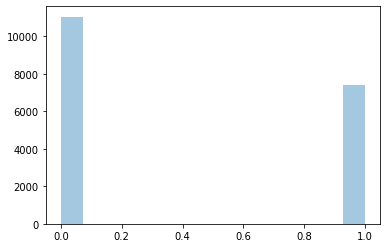

In [25]:
sns.distplot(status_series, kde = False)

C:\Users\91701\anaconda3\envs\deep_learning1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



8.892763900768504


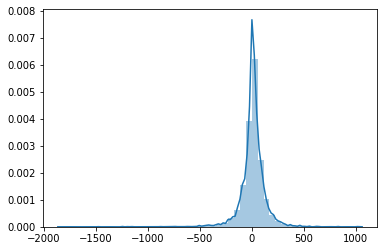

In [26]:
sns.distplot(inc_price)
print(np.mean(inc_price))